<p style="font-family:Verdana; font-size: 26px; color: magenta"> 2.3 ML - Stock Price Prediction using Machine Learning in Python</p>

<p style="font-family:Verdana; font-size: 18px; color: darkorange"> Challenges include::</p> 
<p style="font-family:Verdana; font-size: 18px; color: darkorange"> 1.  - </p>

<p style="font-family:Verdana; font-size: 18px; color: orange"> Step 1: Importing Necessary Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 2: Loading the Data</p>

In [9]:
# Ihe dataset contains 284,807 transactions with 31 features including:
df = pd.read_csv('../../data/tesla_stock_price_14_years.csv')
 
df.sample(3)

,Date,Open,High,Low,Close,Adj Close,Volume
441,2012-03-28,2.518667,2.562667,2.474000,2.523333,2.523333,14325000
2402,2020-01-14,36.284000,36.493999,34.993332,35.861332,35.861332,434943000
37,2010-08-20,1.243333,1.274000,1.234000,1.273333,1.273333,4440000


In [10]:
df.shape

(3432, 7)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3432.0,7.176547e+01,1.019526e+02,1.076000e+00,1.092767e+01,1.704100e+01,1.270525e+02,4.114700e+02
High,3432.0,7.333501e+01,1.042077e+02,1.108667e+00,1.118217e+01,1.730967e+01,1.330392e+02,4.144967e+02
Low,3432.0,7.007102e+01,9.946507e+01,9.986670e-01,1.070667e+01,1.676567e+01,1.232065e+02,4.056667e+02
Close,3432.0,7.174243e+01,1.018694e+02,1.053333e+00,1.096617e+01,1.701967e+01,1.268825e+02,4.099700e+02
Adj Close,3432.0,7.174243e+01,1.018694e+02,1.053333e+00,1.096617e+01,1.701967e+01,1.268825e+02,4.099700e+02
Volume,3432.0,9.689374e+07,7.971433e+07,1.777500e+06,4.626975e+07,8.165340e+07,1.232570e+08,9.140820e+08


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3432 non-null   object 
 1   Open       3432 non-null   float64
 2   High       3432 non-null   float64
 3   Low        3432 non-null   float64
 4   Close      3432 non-null   float64
 5   Adj Close  3432 non-null   float64
 6   Volume     3432 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 187.8+ KB


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 3: Exploratory Data Analysis</p>

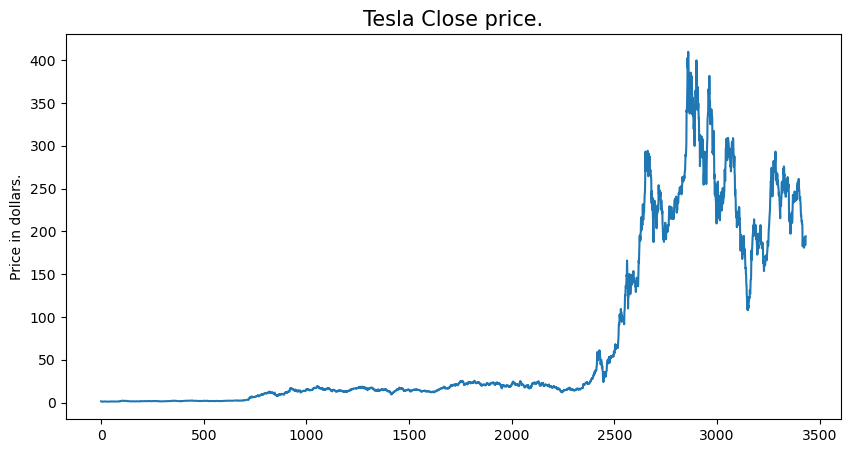

In [13]:
# EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [15]:
df.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
1659,2017-01-31,16.615999,17.059334,16.513332,16.795334,16.795334,61741500


In [16]:
df[df['Close'] == df['Adj Close']].shape

(3432, 7)

In [17]:
# So, having redundant data in the dataset is not going to help so, 
# we'll drop this column before further analysis.
df = df.drop(['Adj Close'], axis=1)

In [18]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 4: Visualize Stock Prices</p>

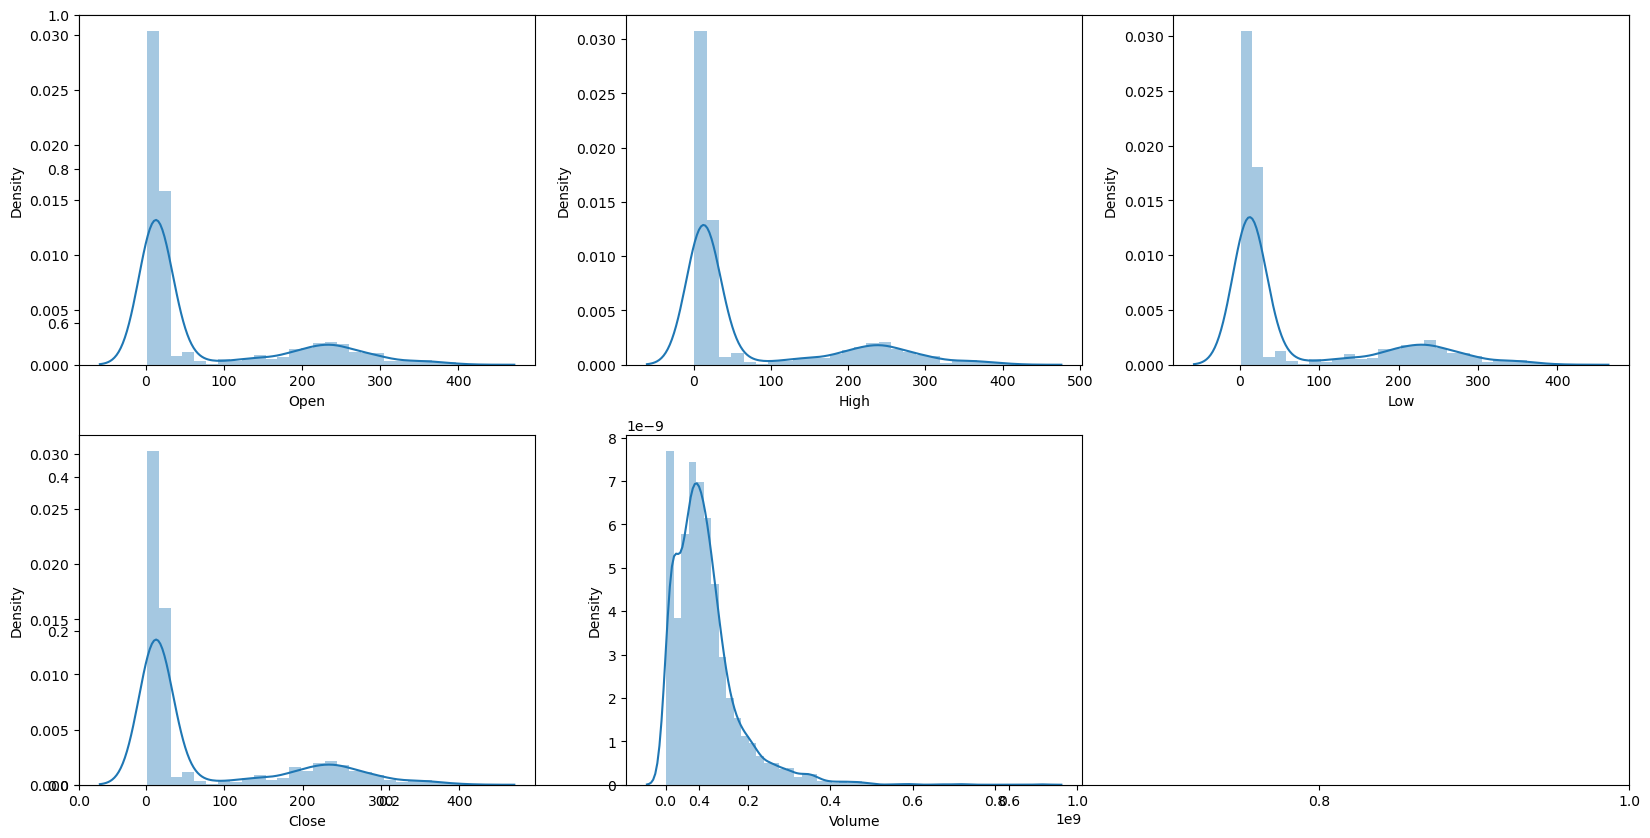

In [20]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

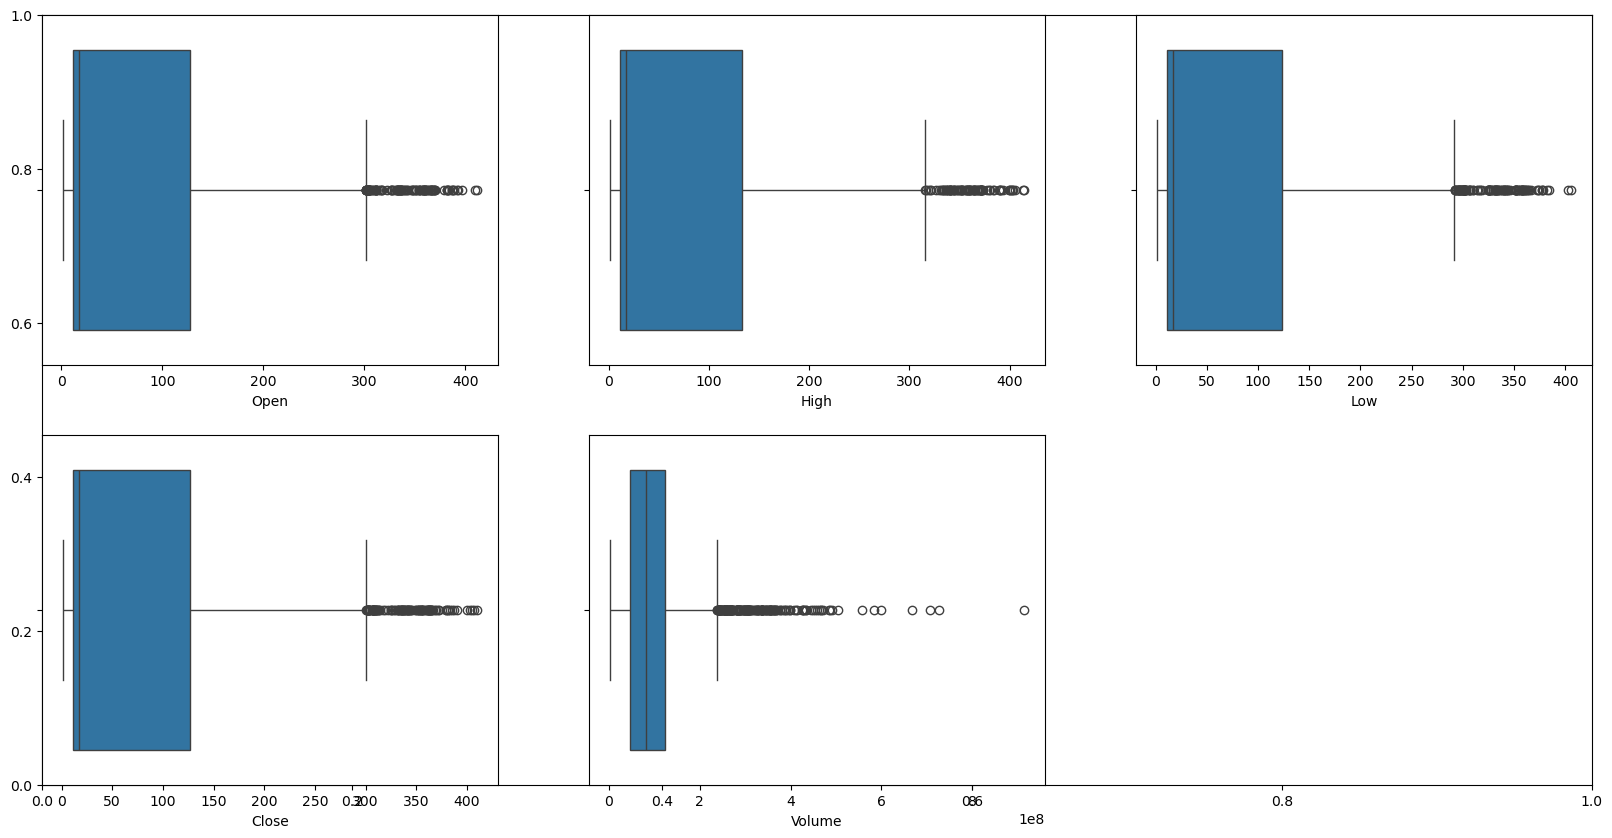

In [22]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col], orient='h')
plt.show()

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 5: Feature Engineering.</p>

In [29]:
splitted = df['Date']
splitted.sample(2)

2763    2021-06-21
1836    2017-10-12
Name: Date, dtype: object

In [34]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int64')
df['month'] = splitted[1].astype('int64')
df['day'] = splitted[2].astype('int64')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,29,6,2010,1
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,30,6,2010,1
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,1,7,2010,0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,2,7,2010,0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,6,7,2010,0


In [35]:
# Now we have three more columns namely 'day', 'month' and 'year' 
# all these three have been derived from the 'Date' column 
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,29,6,2010,1
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,30,6,2010,1
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,1,7,2010,0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,2,7,2010,0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,6,7,2010,0


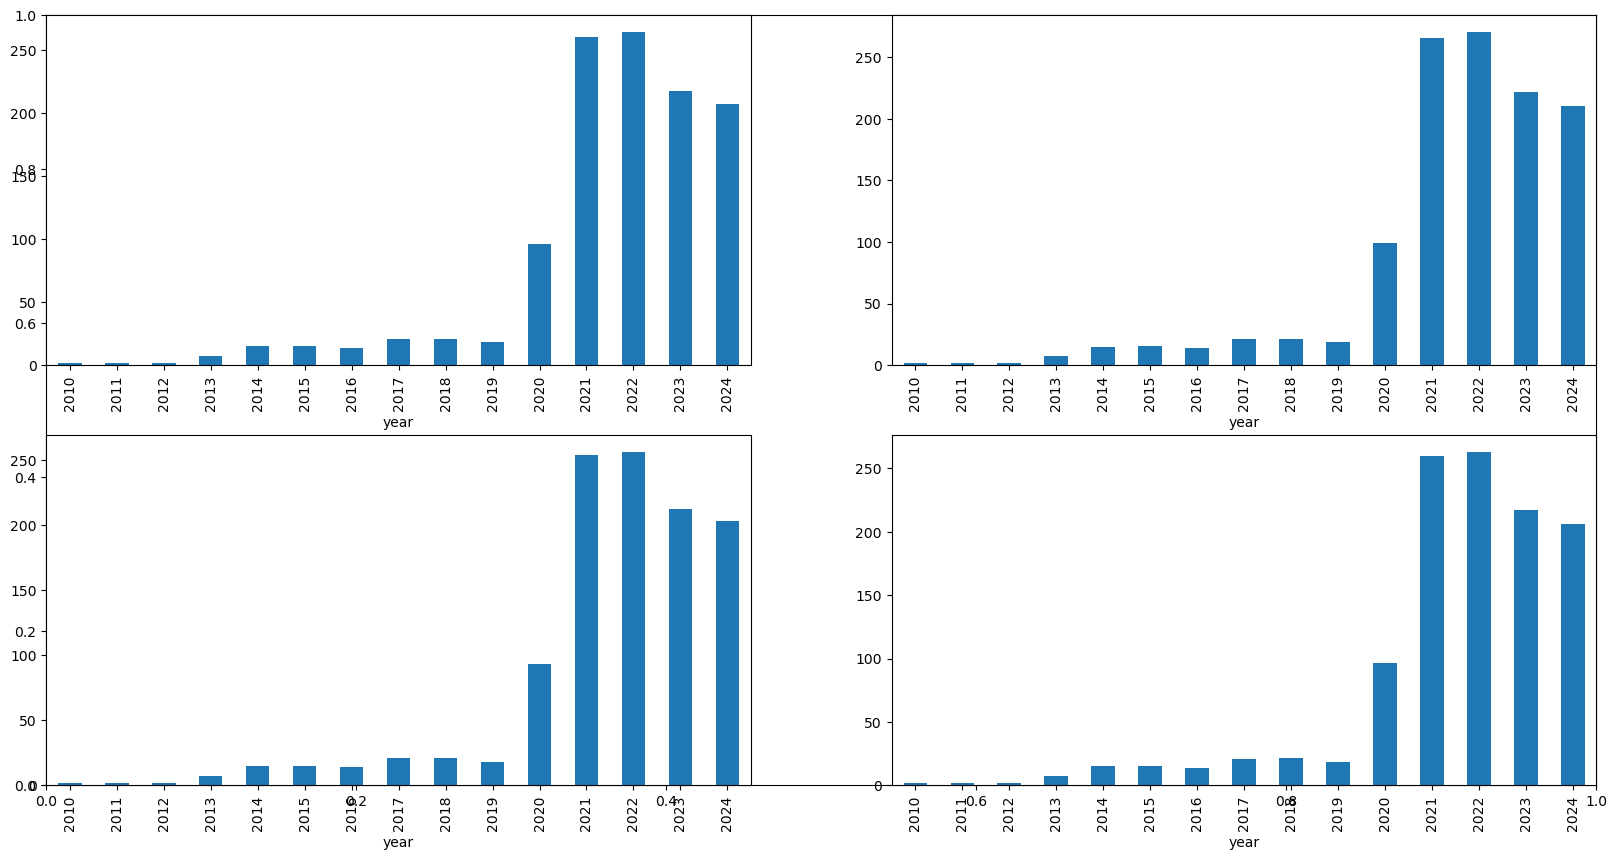

In [38]:
# A quarter is defined as a group of three months. Every company prepares its quarterly results 
# and publishes them publicly so, that people can analyze the company's performance.
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [39]:
# From the above bar graph, we can conclude that the stock prices have declined from the year 2023 to that in 2024.
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,71.432060,72.993883,69.729572,71.387304,9.832575e+07,15.674683,6.136423,2016.826847
1,72.431428,74.016363,70.753010,72.451752,9.403349e+07,15.818341,7.540611,2016.742358


In [ ]:
# Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
# The volume of trades is lower in the months which are quarter end.

In [40]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

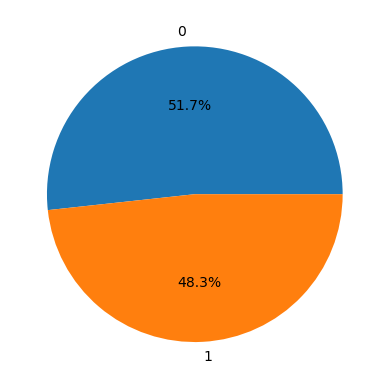

In [41]:
# But before proceeding let's check whether the target is balanced or not using a pie chart.
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

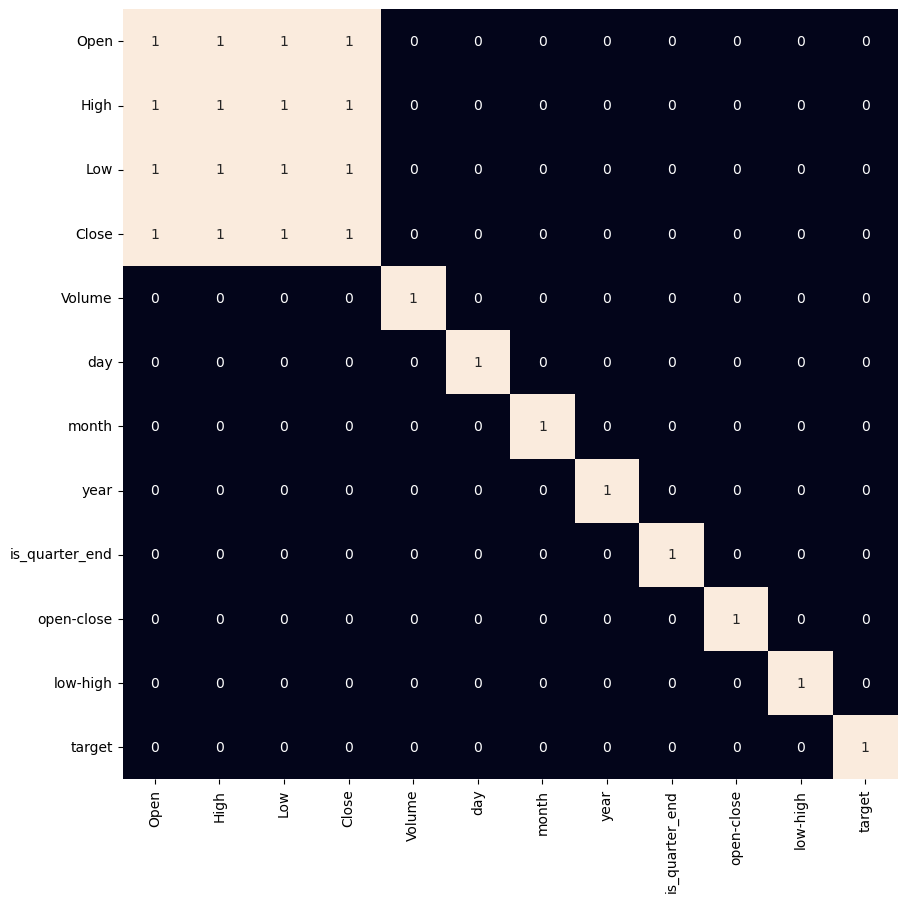

In [42]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [43]:
# From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 6: Data Splitting and Normalization</p>

In [45]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=42)
print(X_train.shape, X_valid.shape)

(3088, 3) (344, 3)


<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 7: Model Development and Evaluation</p>

In [46]:
# For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting 
# the hard probability that is 0 or 1 
# AUC-ROC curve is a graph used to check how well a binary classification model works.

In [47]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5192351310483871
Validation Accuracy :  0.5053254437869823

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5054263272849462
Validation Accuracy :  0.4951141166525782

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Traini

In [ ]:
# Among the three models, we have trained XGBClassifier has the highest performance 
# but it is pruned to overfitting as the difference between the training and the validation accuracy is too high

<p style="font-family:Verdana; font-size: 20px; color: orange"> Step 8: let's plot a confusion matrix for the validation data</p>

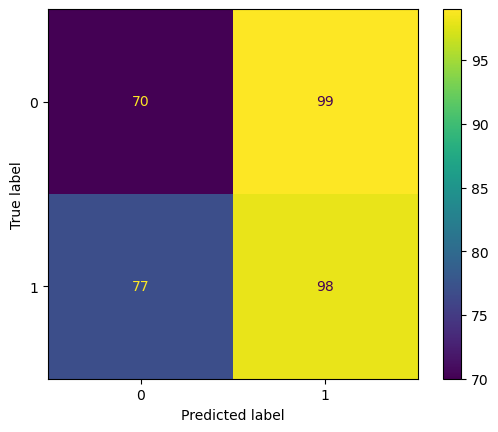

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[2], X_valid, Y_valid)
plt.show()